In [1]:
import random
import time
import tracemalloc
import matplotlib.pyplot as plt
from random import sample

In [2]:
def countingSortForRadix(inputArray, placeValue):
    # We can assume that the number of digits used to represent
    # all numbers on the placeValue position is not grater than 10
    countArray = [0] * 10
    inputSize = len(inputArray)

    # placeElement is the value of the current place value
    # of the current element, e.g. if the current element is
    # 123, and the place value is 10, the placeElement is
    # equal to 2
    for i in range(inputSize): 
        placeElement = (inputArray[i] // placeValue) % 10
        countArray[placeElement] += 1

    for i in range(1, 10):
        countArray[i] += countArray[i-1]

    # Reconstructing the output array
    outputArray = [0] * inputSize
    i = inputSize - 1
    while i >= 0:
        currentEl = inputArray[i]
        placeElement = (inputArray[i] // placeValue) % 10
        countArray[placeElement] -= 1
        newPosition = countArray[placeElement]
        outputArray[newPosition] = currentEl
        i -= 1
        
    return outputArray

def radixSort(inputArray):
    # Step 1 -> Find the maximum element in the input array
    maxEl = max(inputArray)

    # Step 2 -> Find the number of digits in the `max` element
    D = 1
    while maxEl > 0:
        maxEl /= 10
        D += 1
    
    # Step 3 -> Initialize the place value to the least significant place
    placeVal = 1

    # Step 4
    outputArray = inputArray
    while D > 0:
        outputArray = countingSortForRadix(outputArray, placeVal)
        placeVal *= 10  
        D -= 1

    return outputArray

In [5]:
def complexity(data,num):
    subsequence = sample(data, num)
    start = time.time()
    tracemalloc.start()
    radixSort(subsequence)
    end = time.time()
    runtime = end - start
    current, peak = tracemalloc.get_traced_memory()
    usage = current / 10**6
    print(f"Best and average case usage is {usage}MB; Peak was {peak / 10**6}MB")
    tracemalloc.stop()
    print(f"Best and average case runtime is {runtime}")
    return runtime, usage

def complexityW(data,num):
    subsequence = sorted(sample(data, num),reverse=True)
    start = time.time()
    tracemalloc.start()
    radixSort(subsequence)
    end = time.time()
    runtime = end - start
    current, peak = tracemalloc.get_traced_memory()
    usage = current / 10**6
    print(f"Worst case usage is {usage}MB; Peak was {peak / 10**6}MB")
    tracemalloc.stop()
    print(f"Worst and average case runtime is {runtime}")
    return runtime, usage

In [11]:
random.seed(1)
sequence = [i for i in range(100000)]
random.shuffle(sequence)
seqRange = [50,100,200,500,1000,2000,5000,10000]
bestCase = []
worstCase = []

In [12]:
for i in range(8):
     print(f"{i+1}: for {seqRange[i]} items\n --------------------")
     bestCase.append(complexity(sequence,seqRange[i]))
     worstCase.append(complexityW(sequence,seqRange[i]))

1: for 50 items
 --------------------
Best and average case usage is 0.0MB; Peak was 0.001064MB
Best and average case runtime is 0.008979320526123047
Worst case usage is 0.0MB; Peak was 0.001064MB
Worst and average case runtime is 0.007936477661132812
2: for 100 items
 --------------------
Best and average case usage is 0.0MB; Peak was 0.001864MB
Best and average case runtime is 0.009971141815185547
Worst case usage is 0.0MB; Peak was 0.001864MB
Worst and average case runtime is 0.011911153793334961
3: for 200 items
 --------------------
Best and average case usage is 0.000304MB; Peak was 0.003768MB
Best and average case runtime is 0.02521204948425293
Worst case usage is 0.0MB; Peak was 0.003464MB
Worst and average case runtime is 0.018942594528198242
4: for 500 items
 --------------------
Best and average case usage is 0.006018MB; Peak was 0.015538MB
Best and average case runtime is 0.2592785358428955
Worst case usage is 0.00528MB; Peak was 0.014044MB
Worst and average case runtime is

In [13]:
best_runtime, best_usage, = map(list, zip(*bestCase))
worst_runtime, worst_usage, = map(list, zip(*worstCase))

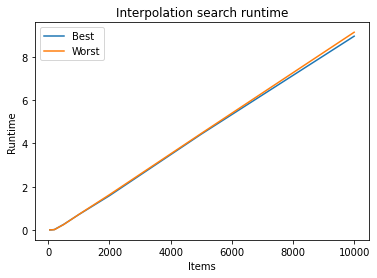

In [15]:
fig, ax = plt.subplots()  
ax.plot(seqRange, best_runtime, label='Best')  
ax.plot(seqRange, worst_runtime, label='Worst')  
ax.set_xlabel('Items')  
ax.set_ylabel('Runtime')  
ax.set_title("Interpolation search runtime")
ax.legend()

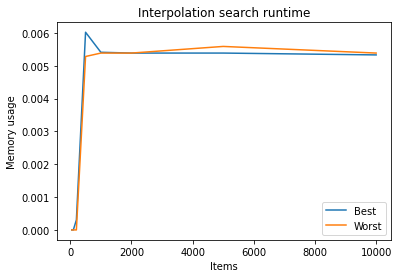

In [16]:
fig, ax = plt.subplots()  
ax.plot(seqRange, best_usage, label='Best')  
ax.plot(seqRange, worst_usage, label='Worst')  
ax.set_xlabel('Items')  
ax.set_ylabel('Memory usage')  
ax.set_title("Interpolation search runtime")
ax.legend()